In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
from matplotlib.patches import ConnectionPatch

In [2]:
def read_bed6(path, headers = ["chromosome","start", "end", "name", "score", "strand"]):
    alignment = pd.read_table(path, header=None, names = headers)
    return alignment

alignment = read_bed6("/content/alignment.bed")
alignment

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


In [3]:
def read_gff(path, headers = ["chromosome", "source", "type", "start", "end", "score", "strand", "phase", "attributes"]):
    annotation = pd.read_table(path, header=0, names = headers)
    return annotation

rrna_annotation = read_gff("/content/rrna_annotation.gff")
rrna_annotation



,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,Name=5S_rRNA;product=5S ribosomal RNA
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,Name=5S_rRNA;product=5S ribosomal RNA
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA


In [4]:

def what_attribut(a):
    if "5S_rRNA" in a:
        return "5S"
    elif "23S_rRNA" in a:
        return "23S"
    elif "16S_rRNA" in a:
        return "16S"
    else:
        return "NA"


rrna_annotation["attributes"] = rrna_annotation["attributes"].apply(what_attribut)
rrna_annotation

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


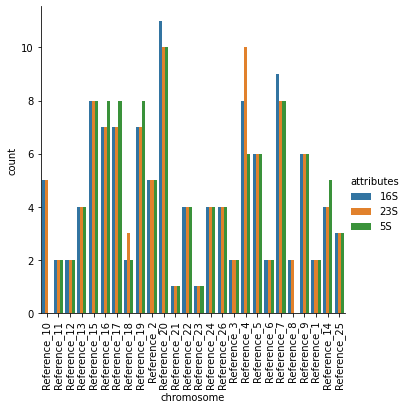

In [5]:
#without table
g = sns.catplot("chromosome", hue="attributes",
                data=rrna_annotation,
                kind="count")
plt.xticks(rotation=90)
plt.show()

In [6]:
#with table
rrna_annotation['count'] = rrna_annotation['attributes']
rrna_annotation_count = rrna_annotation.groupby(['chromosome', 'attributes'], as_index=False).agg({"count": "count"})
rrna_annotation.drop(columns = ['count'],axis = 1)
rrna_annotation_count


,chromosome,attributes,count
0,Reference_1,16S,2
1,Reference_1,23S,2
2,Reference_1,5S,2
3,Reference_10,16S,5
4,Reference_10,23S,5
...,...,...,...
71,Reference_8,16S,2
72,Reference_8,23S,2
73,Reference_9,16S,6
74,Reference_9,23S,6


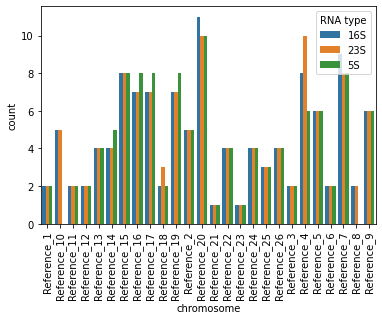

In [7]:
sns.barplot(data = rrna_annotation_count, x ='chromosome', y = 'count', hue = 'attributes')
plt.xticks(rotation=90)
plt.legend(title = 'RNA type', loc = 'upper right')

plt.show()


Last task on pandas?

I have no idea what you want me to do and how you want me to do it.

I'll just leave here some of my random useless undertakings

In [ ]:
def check_intervals_intersect(a_start, a_end, b_start, b_end):
    are_intersect = b_start<a_start and b_end>a_end
    return are_intersect

def function1(rrna_annotation_row, alignment_row, df):
    alignment.apply(function, axis=1)

def function (rrna_annotation_row, alignment_row, df):
    if check_intervals_intersect(alignment["start"], alignment["end"], rrna_annotation["start"], rrna_annotation["end"]):
        temp = [rrna_annotation_row, alignment_row]
        df.loc[ len(df.index )] = temp
    return None

headers = ["chromosome", "source", "type", "start_x", "end_x", "score_x", "strand_x", "phase", "attributes", "start_y", "end_y", "name_y"]
df_intersect = pd.DataFrame(columns=headers)
df_intersect
rrna_annotation.apply(function1, axis=1)
for i in range(len(rrna_annotation.index)):
    for j in range(len(alignment.index)):
        function(rrna_annotation.iloc[i:(i+1), :], alignment[j:(j+1), :], df_intersect)



,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name_y


In [8]:
diffexp = pd.read_table("/content/diffexpr_data.tsv")
diffexp

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000
...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000


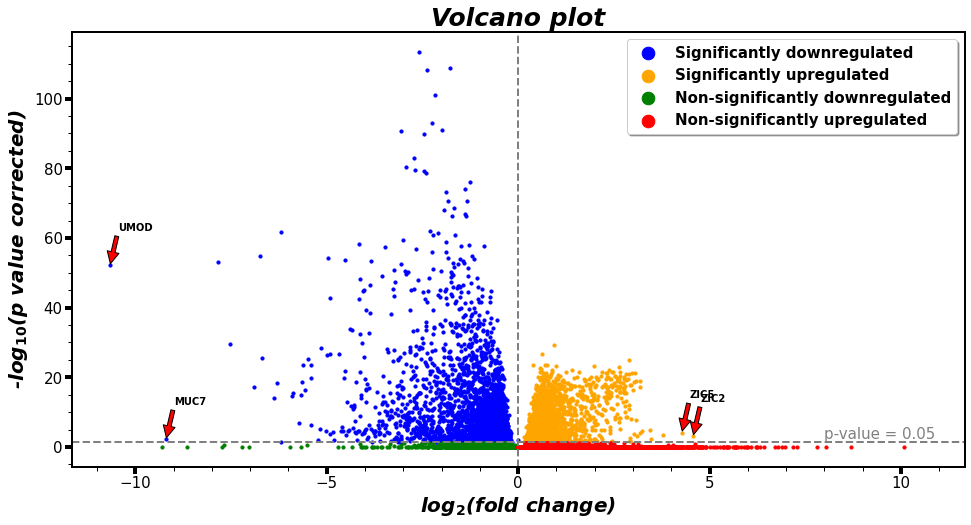

In [9]:
fig, ax = plt.subplots()
limit_p_val = -math.log10(0.05)

ax.scatter(data=diffexp.loc[(diffexp['logFC'] < 0) & (diffexp['log_pval'] >= limit_p_val)], x="logFC", y="log_pval",
           c = 'b', s = 10)
ax.scatter(data=diffexp.loc[(diffexp['logFC'] >= 0) & (diffexp['log_pval'] >= limit_p_val)], x="logFC", y="log_pval",
           c = 'orange', s =10)
ax.scatter(data=diffexp.loc[(diffexp['logFC'] < 0) & (diffexp['log_pval'] < limit_p_val)], x="logFC", y="log_pval",
           c = 'g', s =10)
ax.scatter(data=diffexp.loc[(diffexp['logFC'] >= 0) & (diffexp['log_pval'] < limit_p_val)], x="logFC", y="log_pval",
           c = 'r', s =10)
  
plt.title('Volcano plot', style = 'italic', fontweight='bold', color='k', fontsize=25)
plt.xlabel('log$_{2}$(fold change)', style = 'italic', fontweight='bold', fontsize=20)
plt.ylabel('-log$_{10}$(p value corrected)', style = 'italic', fontweight='bold', fontsize=20)

font = font_manager.FontProperties(weight='bold',
                                   style='normal', size=15)

ax.legend(['Significantly downregulated','Significantly upregulated','Non-significantly downregulated','Non-significantly upregulated'], 
             shadow = True, prop=font , loc="upper right", markerscale = 4)

plt.axhline(y= limit_p_val, color='grey',linewidth=2.0, linestyle='dashed')
plt.axvline(x=0, color='grey',linewidth=2.0, linestyle='dashed')
plt.text(8, 1+limit_p_val, 'p-value = 0.05', fontsize = 15,  color='grey')
plt.rcParams.update({'font.size': 10, 'font.weight': 'bold'})

a = max(abs(float(diffexp.iloc[:,[1]].min(axis=0))), abs(float(diffexp.iloc[:,[1]].max(axis=0))))
plt.xlim([-a-1, a+1])

ax.tick_params(axis = 'both', which = 'major', length = 7, width = 4, pad = 2, labelsize = 15,
               bottom = True, left = True, labelbottom = True, labelleft = True)

ax.tick_params(axis = 'both', which = 'minor', direction = 'out', length = 4,
               width = 1, bottom = True, left = True) 
ax.minorticks_on()

ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)


annot = (diffexp.loc[(diffexp['log_pval'] >= limit_p_val)])
annot = annot.sort_values("logFC", ascending=False)
annot = pd.concat([annot.head(2), annot.tail(2)])
for idx, row in annot.iterrows():
    ax.annotate(row['Sample'], (row['logFC'], row['log_pval']), (row['logFC']+0.2, row['log_pval']+10),'data',
                arrowprops=dict(facecolor='red', shrink=0.05), 
                size=10)

fig.set_figwidth(16) 
fig.set_figheight(8)

plt.show()

In [10]:
table_for_pie = pd.read_excel("/content/table_for_pie.xlsx")
table_for_pie

,Group,Count,Percent
0,Group 1,38,8.50
1,Group 2,38,8.50
2,Group 3,17,3.80
3,Group 4,11,2.46
4,Group 5,28,6.26
...,...,...,...
63,Group 64,1,0.22
64,Group 65,1,0.22
65,Group 66,1,0.22
66,Group 67,1,0.22


Well at least I tried

( ± ﹏ ± )

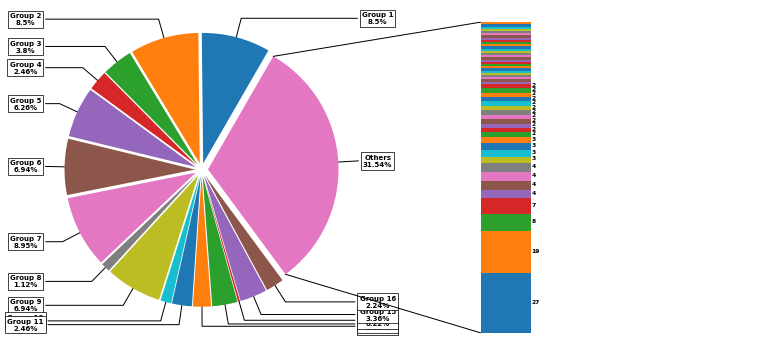

In [11]:
fig, ax = plt.subplots(figsize=(20, 6), subplot_kw=dict(aspect="equal"))

ax2 = fig.add_subplot(122)


labels = list(table_for_pie['Group'][0:16])
labels.append("Others")

ratios = list(table_for_pie['Count'][0:16])
ratios.append(sum(table_for_pie['Count'][16:]))

percent = list(table_for_pie["Percent"][0:16])
percent.append(round(100*sum(table_for_pie['Count'][16:])/sum(table_for_pie['Count']), 2))
 
wedges, texts = ax.pie(ratios, startangle=30*ratios[0], explode= [0.05]*17)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(f'{labels[i]}\n{percent[i]}%', xy=(x, y), xytext=(1.35*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, ha='center', 
                size=7, **kw)



xpos = 0
bottom = 0
ratios2 = list(table_for_pie['Count'][16:])
width = .2
colors = [i for i in range(16, table_for_pie.shape[0])]

for j in range(len(ratios2)):
    height = ratios2[j]
    ax2.bar(xpos, height, width, bottom=bottom)
    ypos = bottom + ax2.patches[j].get_height()/2
    bottom += height
    if ratios2[j] != 1:
        ax2.text(xpos+0.5*width,ypos, ratios2[j], ha='left', size = 6)


theta1, theta2 = ax.patches[16].theta1, ax.patches[16].theta2
center, r = ax.patches[16].center, ax.patches[16].r
bar_height = sum([item.get_height() for item in ax2.patches])
x = r*np.cos(math.pi/180*theta2)+center[0]
y = np.sin(math.pi/180*theta2)+center[1]
con = ConnectionPatch(xyA=(-width/2,bar_height), xyB=(x,y), coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax)
con.set_color([0,0,0])
con.set_linewidth(1)
ax2.add_artist(con)

x = r*np.cos(math.pi/180*theta1)+center[0]
y = np.sin(math.pi/180*theta1)+center[1]
con = ConnectionPatch(xyA=(-width/2,0), xyB=(x,y), coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax)
con.set_color([0,0,0])
ax2.add_artist(con)
con.set_linewidth(1)

plt.axis('off')
plt.xlim(-5*width, 5*width)


plt.show()